In [1]:
#导入所有所需要用到的模块
import pdfplumber
import re
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 设置一个函数pdf_info，用来爬取公司的基本信息
def pdf_info(pdf_name):
    TEXT= ""

    with pdfplumber.open(pdf_name) as pdf:

        for n in range(0, 15):
            page = pdf.pages[n]
            text = page.extract_text()
            if text != None:
                TEXT += text
            else:
                pass

    # 将爬取的pdf文本进行一定的清理，同时定位所需要的部分
    TEXT_clear = TEXT.replace("\n", "")
    TEXT_2 = re.findall("公司简介和主要财务指标(.*?)公司业务概要", TEXT_clear, re.S)[1]

    # 为了减少代码冗余度，我们设置一个循环替代正则表达式的直接编写
    index_name = ["股票简称", "股票代码", "公司的法定代表人", "办公地址", "公司国际互联网网址", "电子信箱"]
    index_name_next = ["股票代码", "公司的中文名称", "注册地址", "办公地址的邮政编码", "电子信箱", "二、联系人和联系方式"]
    values_1 = []
    t = 0
    while t < len(index_name):
        str_re1 = str(index_name[t]) + "(.*?)" + str(index_name_next[t])
        value = re.findall(str_re1, TEXT_2, re.S)[0].replace("\n", "").strip()
        values_1.append(value)
        t += 1

    # 因为部分pdf中，"股票代码"之后不是"公司的中文名称"，所以此处用切片的方式进行一定的处理
    l1 = values_1[0:1] + [str(values_1[1])[0:7]] + values_1[2:]
    str_re2_1 = re.findall("五、主要会计数据和财务指标(.*?)六、分季度主要财务指标", TEXT_2, re.S)[0]
    str_re2_2 = re.findall("营业收入（元）(.*?)归属于上市公司股东的净利润", str_re2_1, re.S)[0]
    str_re2_3 = re.sub(r"-?\d+(?:,\d{1,3})*(?:\.\d+)*%", "", str_re2_2)  # 除去2018年比2017年的增长率
    values_2 = re.findall(r"-?\d+(?:,\d{1,3})*(?:\.\d+)*", str_re2_3)
    for each in values_2:
        l1.append(each)
    return l1

In [3]:
# 设置一个函数，将指定文件夹中所有文件写入列表l2
def file_name(file):
    l2 = []
    for a,b,files in os.walk(file):
        for file in files:
            if os.path.splitext(file)[1] == ".pdf":
                l2.append(os.path.join(a,file))
    return l2

file_name(r"PDF_Source\2019\2019年高新技术企业")

['PDF_Source\\2019\\2019年高新技术企业\\300005：2019年年度报告.pdf',
 'PDF_Source\\2019\\2019年高新技术企业\\300007：2019年年度报告.pdf',
 'PDF_Source\\2019\\2019年高新技术企业\\300008：2019年年度报告(更新后).pdf',
 'PDF_Source\\2019\\2019年高新技术企业\\300009：2019年年度报告.pdf',
 'PDF_Source\\2019\\2019年高新技术企业\\300011：2019年年度报告.pdf',
 'PDF_Source\\2019\\2019年高新技术企业\\300012：2019年年度报告.pdf',
 'PDF_Source\\2019\\2019年高新技术企业\\300014：2019年年度报告.pdf',
 'PDF_Source\\2019\\2019年高新技术企业\\300016：2019年年度报告.pdf',
 'PDF_Source\\2019\\2019年高新技术企业\\300017：2019年年度报告.pdf',
 'PDF_Source\\2019\\2019年高新技术企业\\300018：2019年年度报告(更新后).pdf',
 'PDF_Source\\2019\\2019年高新技术企业\\300019：2019年年度报告.pdf',
 'PDF_Source\\2019\\2019年高新技术企业\\300020：2019年年度报告.pdf',
 'PDF_Source\\2019\\2019年高新技术企业\\300021：2019年年度报告.pdf',
 'PDF_Source\\2019\\2019年高新技术企业\\300022：2019年年度报告(更新后).pdf',
 'PDF_Source\\2019\\2019年高新技术企业\\300023：2019年年度报告.pdf',
 'PDF_Source\\2019\\2019年高新技术企业\\300024：2019年年度报告.pdf',
 'PDF_Source\\2019\\2019年高新技术企业\\300025：2019年年度报告.pdf',
 'PDF_Source\\2019\\2019年高新技术企业\\

In [6]:
#以l3作为行标题，将爬取的公司信息写入一个二维列表df,在此我们只爬取了前40家公司的数据
l3 =  ["股票简称","股票代码","法定代表人","办公地址","公司网址","电子信箱","2019年营业收入","2018年营业收入","2017年营业收入"]
l4 = []
for i in file_name(r"PDF_Source\2019\2019年高新技术企业")[10:20]:
    l4.append(pdf_info(i))
df = pd.DataFrame(data = l4,columns = l3)

In [5]:
df

股票简称    股票代码 法定代表人                          办公地址                     公司网址  \
0  硅宝科技  300019   王有治                  成都高新区新园大道16号            www.guibao.cn   
1  银江股份  300020    王腾               浙江省杭州市西湖区西园八路2号          www.enjoyor.net   
2  大禹节水  300021   王浩宇             天津市武清区京滨工业园民旺道10号             www.dyjs.com   
3  吉峰科技  300022   王新明  成都市郫都区成都现代工业港北部园区港通北二路 219 号    http://www.gifore.com   
4  宝德股份  300023    赵敏        西安市高新区草堂科技产业基地秦岭大道西付6号           www.bode-e.com   
5   机器人  300024   曲道奎                 沈阳市浑南新区全运路33号    http://www.siasun.com   
6  华星创业  300025   朱定楷             杭州市滨江区长河街道聚才路500号   http://www.hxcy.com.cn   
7  阳普医疗  300030   邓冠华         广州市经济技术开发区科学城开源大道102号  www.improve-medical.com   
8  宝通科技  300031   包志方               江苏省无锡市新吴区张公路19号  http://www.botontech.cn   
9   同花顺  300033    易峥              杭州市余杭区五常街道同顺街18号        www.10jqka.com.cn   

                         电子信箱         2019年营业收入         2018年营业收入  \
0            guibao@guibao.cn  1,018,035,009.07    870,572,981.41   
1         enjoyor@enjoyor.net  2,079,504,434.71  2,413,277,806.75   
2            dyjszqb@dyjs.com  2,165,853,141.43  1,779,589,084.67   
3           office@gifore.com  2,295,229,258.90  2,972,935,403.17   
4        dongmiban@bode-e.com    124,817,327.95    418,236,046.93   
5              zqb@siasun.com  2,745,485,120.35  3,094,726,945.21   
6          hxcy_1@hxcy.com.cn  1,046,948,302.01  1,363,927,579.23   
7   board@improve-medical.com    575,061,342.97    549,963,261.99   
8  boton300031@boton-tech.com  2,475,616,071.21  2,166,229,147.53   
9         myhexin@myhexin.com  1,742,093,893.20  1,386,887,015.18   

          2017年营业收入  
0    728,230,612.72  
1  1,942,221,214.28  
2  1,284,423,666.00  
3  3,097,332,641.62  
4    721,537,563.87  
5  2,455,063,972.29  
6  1,415,404,853.57  
7    549,652,842.55  
8  1,579,818,747.43  
9  1,409,698,260.25

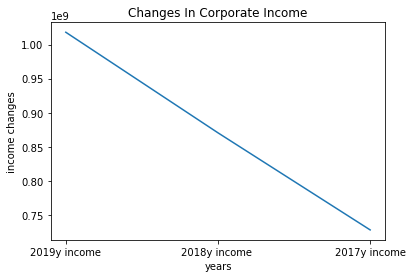

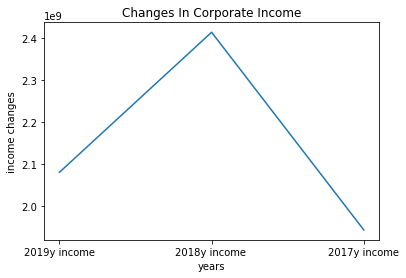

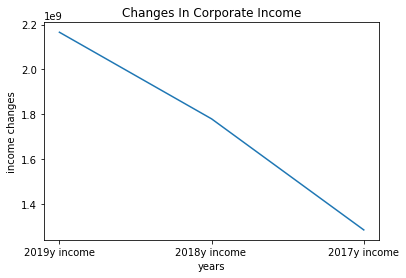

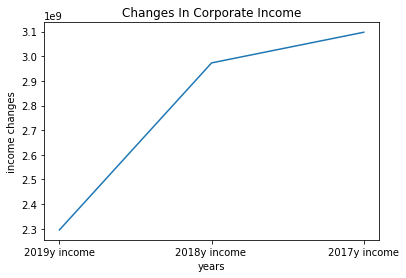

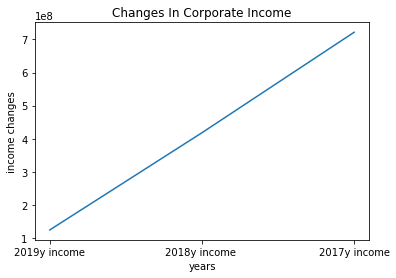

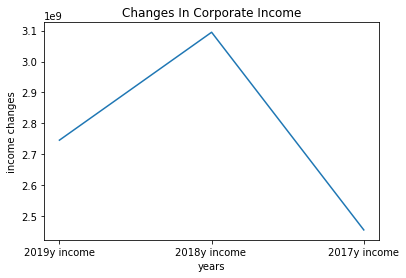

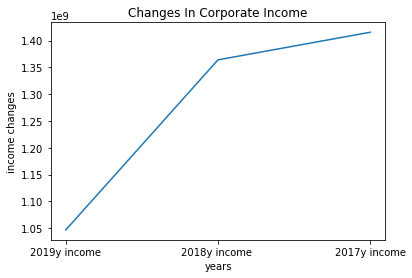

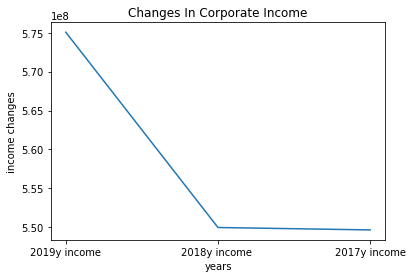

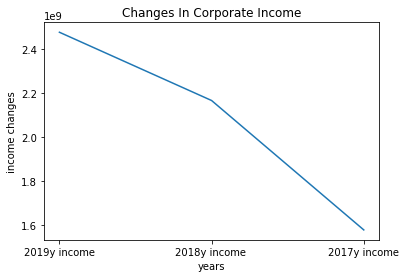

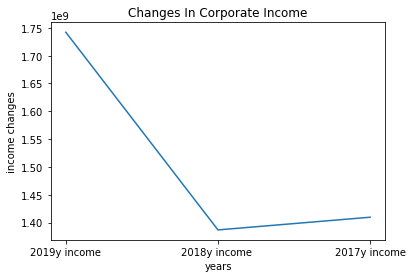

In [73]:
for i in range(10):
    y=[]
    for j in range(6,9,1):
        sz=l4[i][j]
        y1=float(re.sub(",","",sz))
        y.append(y1)
    x=["2019y income","2018y income ","2017y income"]
    plt.title("Changes In Corporate Income") 
    plt.xlabel("years") 
    plt.ylabel("income changes") 
    plt.plot(x,y) 
    plt.show()

## 规律总结

在随机选取的十家公司中只有四家从2017年到2019年持续增长，其他六家公司都是呈现下降的趋势，证明在2019年高新技术企业中，很多企业没有如预期所想达到高增长的目的，很多则是实现负增长，甚至出现了净亏损，这是现阶段面临的巨大问题！

'王浩宇'